In [301]:
import pandas as pd#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 6]
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [302]:
df=pd.read_csv('/content/Zoo.csv')#loading the dataset

In [303]:
df.head()#checking first 5 rows of data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [304]:
df.info()#checking null values,datatype,number of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [305]:
df.describe()#summary statistics

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


# **Tasks**

In [306]:
df.isna().sum()#checking missing values

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [307]:
from sklearn.preprocessing import LabelEncoder#label encoding for animal name column because it is categorical column changing into numerical colum
le = LabelEncoder()
df['animal name'] = le.fit_transform(df['animal name'])

<Axes: >

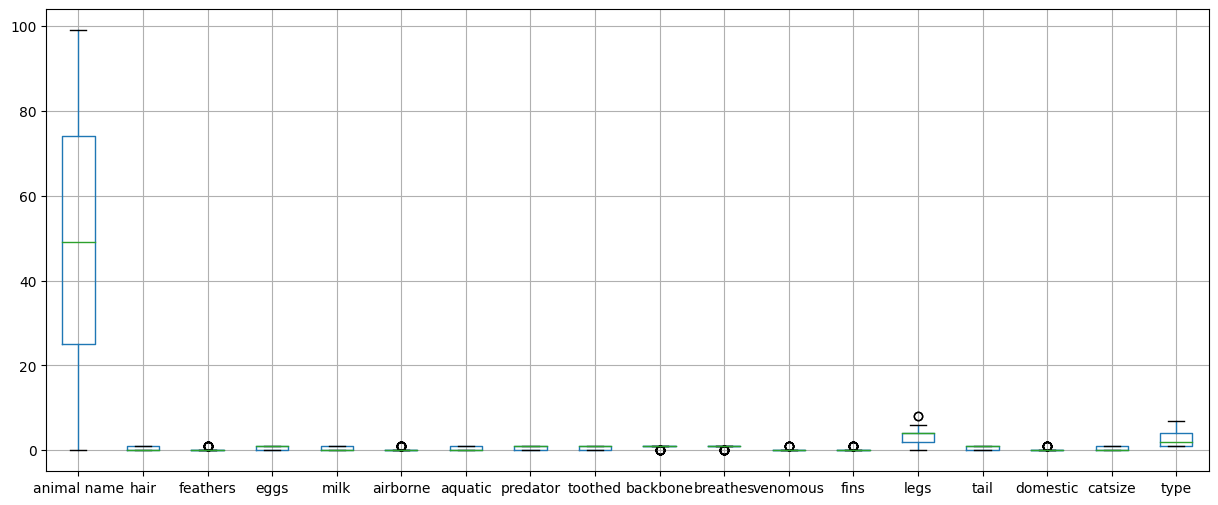

In [308]:
df.boxplot()#boxplot of dataset

In [309]:
def cap_upper_outliers(df, column):#imputation of outliers
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Compute the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the upper bound (threshold for outliers)
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    # Cap values above the upper bound
    df[column] = df[column].apply(lambda x: min(x, upper_bound))
    df[column] = df[column].apply(lambda x: max(min(x,upper_bound),lower_bound))
    return df

# List of numerical columns to cap outliers
columns_to_cap = ['feathers', 'airborne',
       'backbone', 'breathes', 'venomous',
       'fins', 'legs',  'domestic']
      # Include 'fbs' if it's not binary

# Apply the capping function to each column
for col in columns_to_cap:
    df = cap_upper_outliers(df, col)

<Axes: >

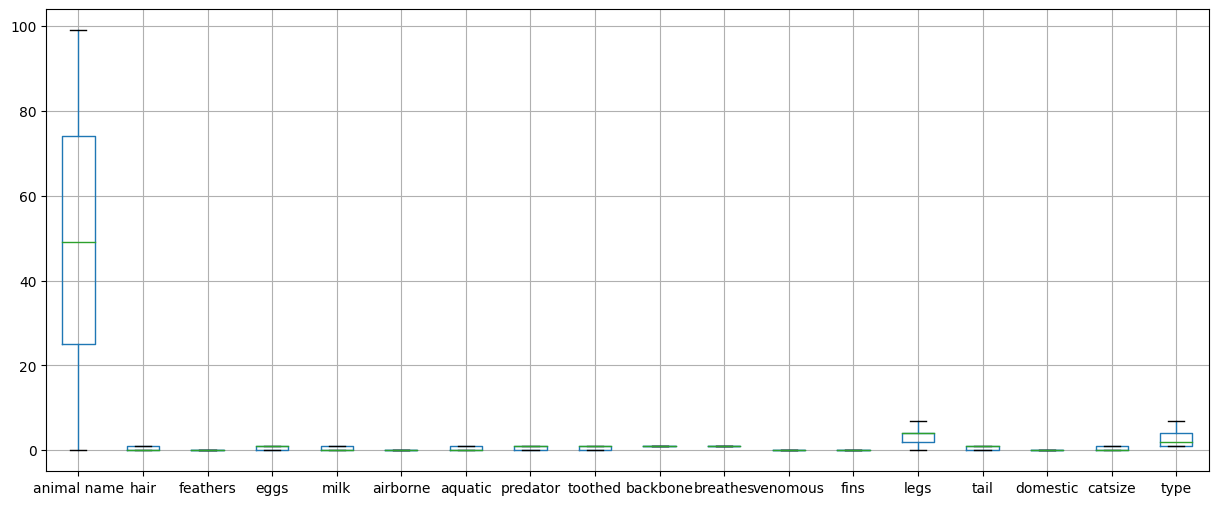

In [310]:
df.boxplot()#checking the outliers

<Axes: >

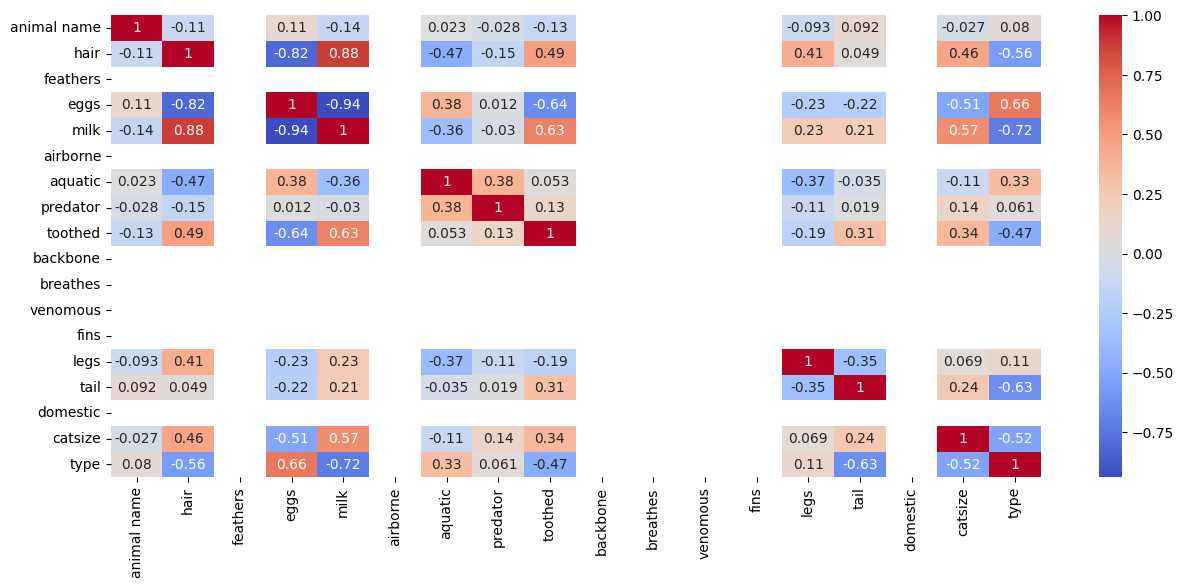

In [311]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')#correlation matrix

In [312]:
from sklearn.model_selection import train_test_split#splitting the data with train_test_split
X=df.drop(columns='type')
y=df['type']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [313]:
from sklearn.neighbors import KNeighborsClassifier#knn model building
#Intializing model
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
#fitting the model
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

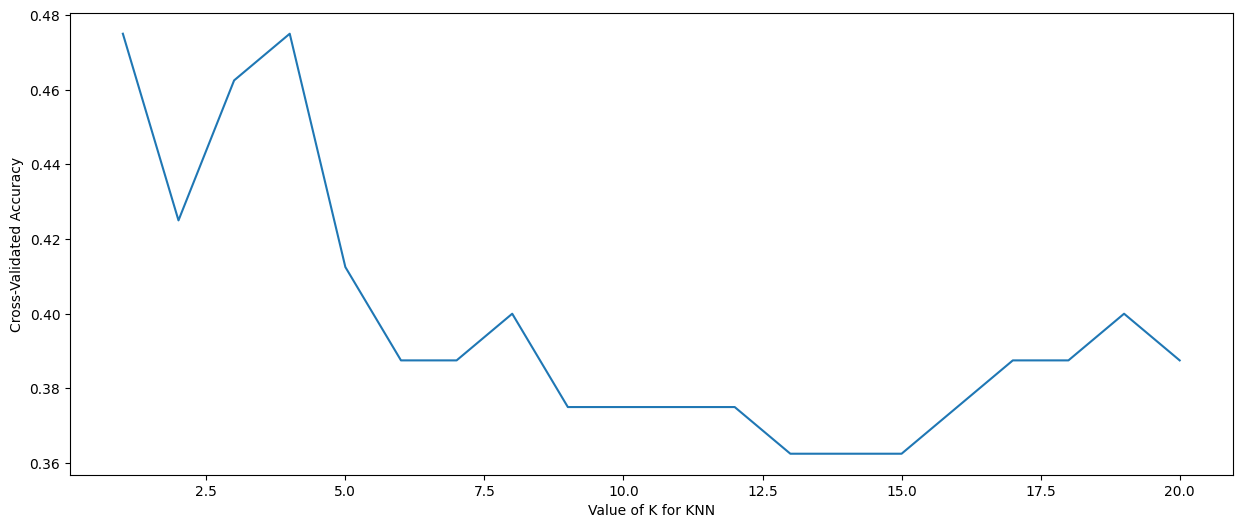

In [314]:
from sklearn.model_selection import cross_val_score#cross validation for choosing appropriate
import numpy as np

# Cross-validation to determine the best K
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot to choose K (Elbow method)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


In [315]:
print(k_range)#printing hyper parameters score,range
print(k_scores)

range(1, 21)
[0.475, 0.425, 0.4625, 0.475, 0.4125, 0.3875, 0.3875, 0.4, 0.375, 0.375, 0.375, 0.375, 0.3625, 0.3625, 0.3625, 0.375, 0.3875, 0.3875, 0.4, 0.3875]


In [316]:
from sklearn.neighbors import KNeighborsClassifier#re-building the model
#Intializing model
knn_best=KNeighborsClassifier(n_neighbors=2,metric='euclidean')
#fitting the model
knn_best.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [317]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score#evaluation metrics

# Predict on the test set
y_pred = knn_best.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Accuracy: 0.42857142857142855
Precision: 0.13406593406593406
Recall: 0.17261904761904762
F1-Score: 0.14718614718614717


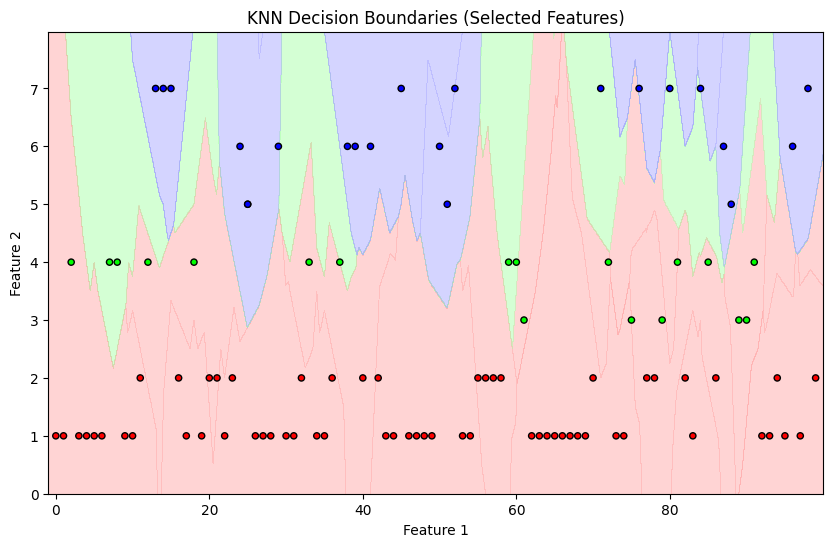

In [318]:
from matplotlib.colors import ListedColormap#visulaization of decision boundaries of classifier
from sklearn.neighbors import KNeighborsClassifier

X = df
y = df['type']

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title="Decision Boundaries"):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict for every point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create the plot
    plt.figure(figsize=(10, 6))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # For decision boundaries
    cmap_bold = ['#FF0000', '#00FF00', '#0000FF']  # For data points

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap_light)

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Selecting two features for visualization (replace 'feature1' and 'feature2' with actual column names)
feature1 = 'animal name'
feature2 = 'type'

# Preparing the data for visualization
X_visual = X[[feature1, feature2]].values  # Select only the two features for visualization

# Fitting the KNN model on the selected features
knn_best.fit(X_visual, y)

# Visualize decision boundaries using the two selected features
plot_decision_boundaries(X_visual, y, knn_best, title="KNN Decision Boundaries (Selected Features)")


# **Interview Questions**

# Key hyperparameters in KNN:

**Number of Neighbors (K):** The number of nearest neighbors to consider for making a classification.

**Distance Metric:** The metric used to measure the distance between data points (e.g., Euclidean, Manhattan, Minkowski).

**Weights:** Determines if closer neighbors should have more influence on the classification decision (e.g., uniform or distance-weighted).

# Distance metrics can be used in KNN:

**Euclidean Distance:** This distance is the most widely used one as it is the default metric that SKlearn library of Python uses for K-Nearest Neighbour. It is a measure of the true straight line distance between two points in Euclidean space.

**Manhattan Distance:** This distance is also known as taxicab distance or city block distance, that is because the way this distance is calculated. The distance between two points is the sum of the absolute differences of their Cartesian coordinates.

**Minkowski Distance:**It is a metric intended for real-valued vector spaces. We can calculate Minkowski distance only in a normed vector space, which means in a space where distances can be represented as a vector that has a length and the lengths cannot be negative.